In [188]:
# opens SQL query directly in Python, rather than open from CSV
# pyodbc for ODBC connection
import pyodbc
# pandas for 'excel' like sheets
import pandas as pd
# datetime for date computer date

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=ASU_Professor_Salary;Trusted_Connection=yes;')
cursor = connection.cursor()

ASU_Dept_Query = '''
select
		Y18.Department_Description
		,Y12.Salary as _2012
		,Y13.Salary as _2013
		,Y14.Salary as _2014
		,Y15.Salary as _2015
		,Y16.Salary as _2016
		,Y17.Salary as _2017
		,Y18.Salary as _2018
		
	from (select [Department_Description]  --subselect groups departments that existed in the 2018 dataset
			,sum([Salary]) as Salary
		  from [dbo].[ASU Employee Salary Data - 2018]
		  group by [Department_Description]) as Y18
		
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2012]
		             group by [Department_Description]) as Y12 
					 on Y12.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2013]
		             group by [Department_Description]) as Y13
					 on Y13.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2014]
		             group by [Department_Description]) as Y14 
					 on Y14.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2015]
		             group by [Department_Description]) as Y15
					 on Y15.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2016]
		             group by [Department_Description]) as Y16
					 on Y16.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2017]
		             group by [Department_Description]) as Y17
					 on Y17.[Department_Description] = Y18.[Department_Description]

	order by Y18.Salary desc

  '''
# save the sql query to a pandas dataframe
ASU_Dept_Data = pd.read_sql(ASU_Dept_Query, connection)
connection.close()

Department_Description,SDA Administration,School Of Earth & Space Explor,Sch Elect Comptr & Energy Engr,College Of Law,Sols Administration & Faculty,Sch Compt Infor & Dec Sys Engr,Sch Engr Matter Trnsprt Energy,School of Math & Stat Sciences,English,Psychology,...,ASUHS Operations Lead,MTBI,ASUP Police Department,"Noble Lib Serv, Govt Info",University Staff Council,SDA Aquatic Complex,AISSS West,Program Metabolic Biology,DPC Information Desk,Rocky Mountain Math Consortium
_2012,15278195.43,8516937.45,9769400.90,11450116.33,11856118.63,8178457.73,8354487.96,8435982.71,8807178.79,7920794.60,...,321646.66,37450.00,35820.38,584627.07,23400.0,30098.51,19563.15,257170.78,15080.00,19874.75
_2013,16358819.19,10098830.16,10310200.49,11297878.88,12213788.92,8929191.98,8762461.28,9272779.33,9597718.75,9285097.56,...,331724.07,38352.54,37611.40,649995.49,24125.4,30775.73,20150.05,201498.33,15683.07,19874.75
_2014,19442560.35,11138484.59,10310961.24,12262677.71,12663035.36,9919574.60,10232212.05,9455491.29,10532639.97,9796134.87,...,185757.93,39708.87,38708.80,557445.53,24741.6,31391.24,25326.60,204820.33,19320.08,20371.62
_2015,21200237.53,11143446.39,11831195.45,12193705.18,12411504.38,10062106.40,10315208.46,10171361.88,10894477.17,8943720.17,...,145253.61,39708.87,38708.80,586232.72,24741.6,31391.24,52951.64,90765.37,19320.08,20371.62
_2016,24275289.13,12286891.77,12420762.21,12874334.67,12029652.47,10326123.54,11159164.36,10648879.84,11170046.97,9083040.20,...,191830.41,36000.00,39416.00,529403.88,33654.4,32323.20,26826.60,92746.14,22495.20,21000.00


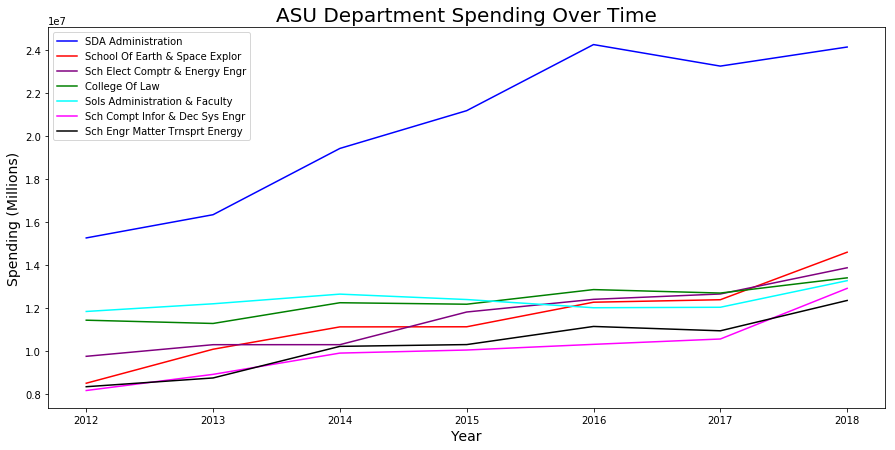

In [239]:
ASU_Dept_Data_Trans = ASU_Dept_Data.set_index('Department_Description').transpose() #rotate years to be the index

ASU_Dept_Data_Trans.index = ASU_Dept_Data_Trans.index.str.replace('_','') #remove underscore from attribute 'years' these were necessary to perform the SQL query

#add precision to dollar amounts on Y axis

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

plt.rcParams["figure.figsize"] = [15, 7]    #sets the ploted size
plt.title("ASU Department Spending Over Time",fontsize=20)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Spending (Millions)",fontsize=14)

y1 = ASU_Dept_Data_Trans.iloc[:,0]
y2 = ASU_Dept_Data_Trans.iloc[:,1]
y3 = ASU_Dept_Data_Trans.iloc[:,2]
y4 = ASU_Dept_Data_Trans.iloc[:,3]
y5 = ASU_Dept_Data_Trans.iloc[:,4]
y6 = ASU_Dept_Data_Trans.iloc[:,5]
y7 = ASU_Dept_Data_Trans.iloc[:,6]

x = ASU_Dept_Data_Trans.index

# plt.ylim(0, 30000000)

plt.plot(x, y1, color='blue')
plt.plot(x, y2, color='red')
plt.plot(x, y3, color='purple')
plt.plot(x, y4, color='green')
plt.plot(x, y5, color='cyan')
plt.plot(x, y6, color='magenta')
plt.plot(x, y7, color='black')
plt.legend()

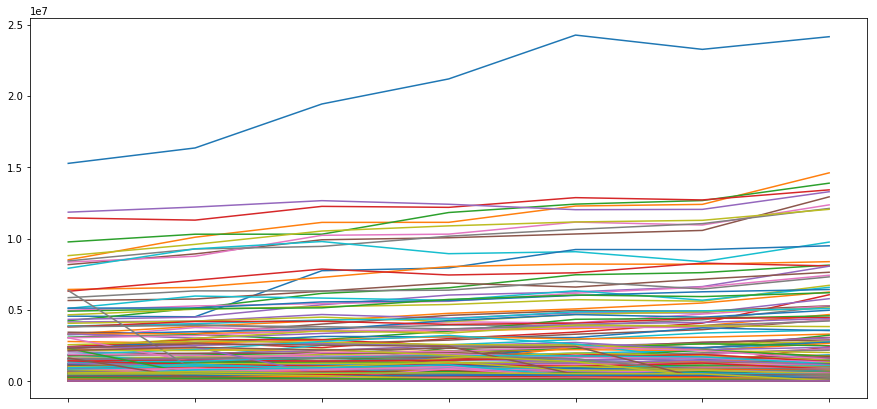

In [237]:
fig, ax = plt.subplots(figsize=(15,7))
ASU_Dept_Data_Trans.plot(ax=ax)
ax.get_legend().remove()

# ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%2e'))